### Bu ödevde ABD Eğitim Sistemi'ne ait bir takım verileri inceleyeceksiniz. Öncelikle veri kümesini Kaggle'dan indirin. Burada eğitim sistemine ait bir çok veri kümesi bulunmaktadır. Bu ödevde 'states_all.csv' isimli veri kümesini kullanacaksınız.
### Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

### Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?
### 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

abd= pd.read_csv("abd.csv")

abd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [13]:
abd.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [17]:
abd.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [25]:
abd.isna().sum()*100/abd.shape[0]

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

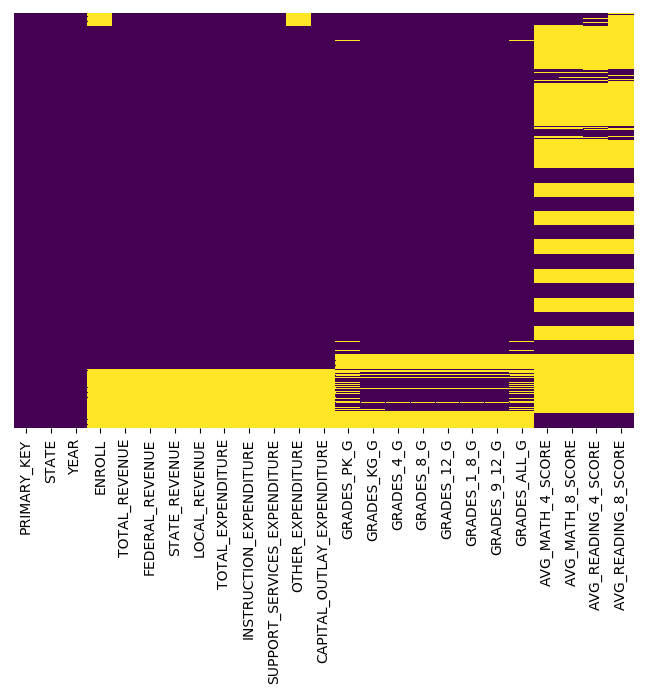

In [22]:
sns.heatmap(abd.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [37]:
abd["ENROLL"].fillna(abd["ENROLL"].mean(), inplace=True)
abd["TOTAL_REVENUE"].fillna(abd["TOTAL_REVENUE"].mean(), inplace=True)
abd["FEDERAL_REVENUE"].fillna(abd["FEDERAL_REVENUE"].mean(), inplace=True)
abd["STATE_REVENUE"].fillna(abd["STATE_REVENUE"].mean(), inplace=True)
abd["LOCAL_REVENUE"].fillna(abd["LOCAL_REVENUE"].mean(), inplace=True)
abd["TOTAL_EXPENDITURE"].fillna(abd["TOTAL_EXPENDITURE"].mean(), inplace=True)
abd["INSTRUCTION_EXPENDITURE"].fillna(abd["INSTRUCTION_EXPENDITURE"].mean(), inplace=True)
abd["SUPPORT_SERVICES_EXPENDITURE"].fillna(abd["SUPPORT_SERVICES_EXPENDITURE"].mean(), inplace=True)
abd["OTHER_EXPENDITURE"].fillna(abd["OTHER_EXPENDITURE"].mean(), inplace=True)
abd["CAPITAL_OUTLAY_EXPENDITURE"].fillna(abd["CAPITAL_OUTLAY_EXPENDITURE"].mean(), inplace=True)
abd["GRADES_PK_G"].fillna(abd["GRADES_PK_G"].mean(), inplace=True)
abd["GRADES_KG_G"].fillna(abd["GRADES_KG_G"].mean(), inplace=True)
abd["GRADES_4_G"].fillna(abd["GRADES_4_G"].mean(), inplace=True)
abd["GRADES_8_G"].fillna(abd["GRADES_8_G"].mean(), inplace=True)
abd["GRADES_12_G"].fillna(abd["GRADES_12_G"].mean(), inplace=True)
abd["GRADES_1_8_G"].fillna(abd["GRADES_1_8_G"].mean(), inplace=True)
abd["GRADES_9_12_G"].fillna(abd["GRADES_9_12_G"].mean(), inplace=True)
abd["GRADES_ALL_G"].fillna(abd["GRADES_ALL_G"].mean(), inplace=True)
abd["AVG_MATH_4_SCORE"].fillna(abd["AVG_MATH_4_SCORE"].mean(), inplace=True)
abd["AVG_MATH_8_SCORE"].fillna(abd["AVG_MATH_8_SCORE"].mean(), inplace=True)
abd["AVG_READING_4_SCORE"].fillna(abd["AVG_READING_4_SCORE"].mean(), inplace=True)
abd["AVG_READING_8_SCORE"].fillna(abd["AVG_READING_8_SCORE"].mean(), inplace=True)
abd.isna().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

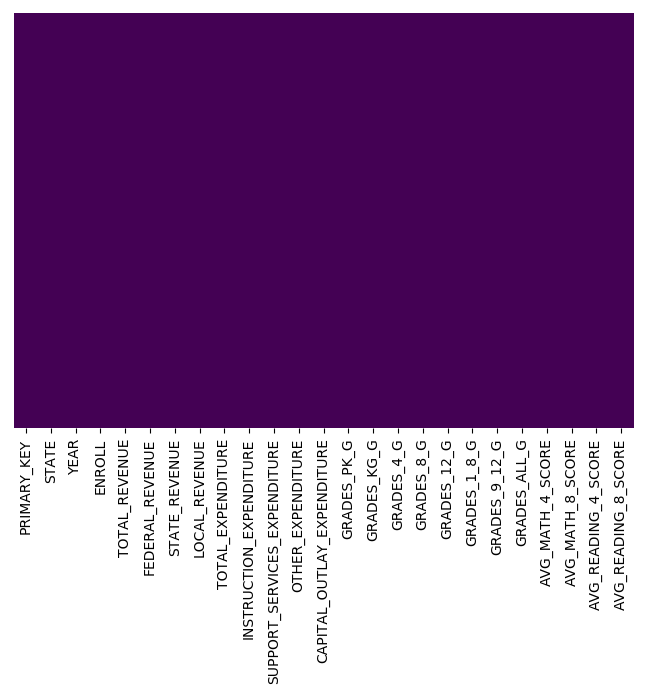

In [38]:
sns.heatmap(abd.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()